In [1]:
#https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/
    
#Imports
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#from sklearn import make_blobs, make_circles
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten

Using Theano backend.


In [2]:
import cv2
import os
from random import shuffle
from tqdm import tqdm

#TRAIN_DIR = '/home/nick/Documents/data/cats_vs_dogs/train/'
#TEST_DIR = '/home/nick/Documents/data/cats_vs_dogs/test/'
TRAIN_DIR = '/Users/yannick/Documents/Playground/Python/data/cats_vs_dogs/train/'
TEST_DIR = '/Users/yannick/Documents/Playground/Python/data/cats_vs_dogs/test/'

IMG_SIZE = 50
LR = 0.001

MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

In [3]:
def label_img(img):
    word_label = img.split('.')[-3]
    if word_label == 'cat': return [1,0]
    elif word_label == 'dog': return [0,1]

In [4]:
os.listdir(TRAIN_DIR)
print(len(tqdm(os.listdir(TRAIN_DIR))))

for img in tqdm(os.listdir(TRAIN_DIR)):
    #label = label_img(img)
    if len(img.split('.')) == 4:print("skip")
    else: print("Ok!")

  4%|▍         | 1010/25000 [00:00<00:02, 10095.85it/s]

25000
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok

 10%|█         | 2621/25000 [00:00<00:02, 8976.62it/s] 


Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!

 21%|██▏       | 5320/25000 [00:00<00:02, 8962.49it/s]

Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!


 28%|██▊       | 7125/25000 [00:00<00:02, 8811.38it/s]


Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!

 36%|███▌      | 8992/25000 [00:01<00:01, 9062.72it/s]

Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!


 44%|████▎     | 10880/25000 [00:01<00:01, 9262.69it/s]


Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!

 51%|█████     | 12779/25000 [00:01<00:01, 9106.26it/s]

Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!


 55%|█████▌    | 13816/25000 [00:01<00:01, 9450.34it/s]

Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!


 63%|██████▎   | 15810/25000 [00:01<00:00, 9620.27it/s]

Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!


 71%|███████   | 17697/25000 [00:01<00:00, 9013.87it/s]


Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!

 78%|███████▊  | 19536/25000 [00:02<00:00, 9039.55it/s]


Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!

 86%|████████▌ | 21560/25000 [00:02<00:00, 9138.46it/s]

Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!


 98%|█████████▊| 24452/25000 [00:02<00:00, 9103.93it/s]

Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!


100%|██████████| 25000/25000 [00:02<00:00, 9173.57it/s]


Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!
Ok!

In [4]:

def create_train_data():
    training_data = []
    nbImages = 0
    for img in tqdm(os.listdir(TRAIN_DIR)):
        if nbImages < 2000:
            if len(img.split('.')) == 3:
                label = label_img(img)
                path = os.path.join(TRAIN_DIR, img)
                #img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE, IMG_SIZE))
                #img = cv2.resize(cv2.imread(path, cv2.COLOR_BGR2RGB), (IMG_SIZE, IMG_SIZE))
                img = cv2.imread(path, cv2.COLOR_BGR2RGB)
                training_data.append([np.array(img), np.array(label)])
                nbImages+=1
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data
        

In [5]:
train_data = create_train_data()

#for num, data in enumerate(train_data[:3]):
#    print(num)
#    print(data[1])
#    print(data[0])

100%|██████████| 25000/25000 [00:41<00:00, 601.00it/s]


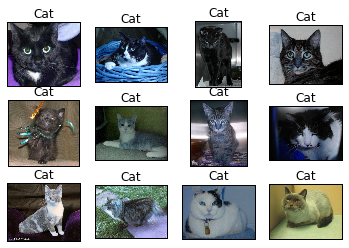

In [9]:
fig = plt.figure()

for num, data in enumerate(train_data[24:36]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = orig #img_data.reshape(IMG_SIZE, IMG_SIZE, 3)
    
    #model_out = model.predict([data])[0]
    
    if img_num[0] == 0: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig)
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [11]:
#train = train_data[:-500]
#test = train_data[-500:]

train = train_data

#array[:,0] and array[:,1] seems NOT to work here :(
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = np.array([i[1] for i in train])

print(X.shape)
#print(len(X))
#print(X[1])

print(Y.shape)
#print(len(Y))
#print(Y[1])

#test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
#test_y = [i[1] for i in test]

ValueError: total size of new array must be unchanged

In [ ]:
#Model #1
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))  
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))  
model.add(MaxPooling2D())

# Flatten CNN layers output
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(2, activation='softmax'))

# Optimizer
model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
#Model #2
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))  
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))  
model.add(MaxPooling2D())

# Flatten CNN layers output
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(2, activation='softmax'))

# Optimizer
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
# Fit model
history = model.fit(X, Y, validation_split=0.1, epochs=5, batch_size=32, verbose=2)

In [ ]:
def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        if len(img.split('.')) == 2:
            path = os.path.join(TEST_DIR,img)
            img_num = img.split('.')[0]
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            testing_data.append([np.array(img), img_num])

    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

In [ ]:
#https://www.youtube.com/watch?v=27FPv1VHSsQ

#test_data = process_test_data()
test_data = np.load('test_data.npy')

fig = plt.figure()

for num, data in enumerate(test_data[1130:1139]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,3,num+1)
    orig = img_data
    data = img_data.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    
    model_out = model.predict([data])[0]
    #model_out = 1
    
    if np.argmax(model_out) == 1: str_label = 'Dog'
    else: str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()


In [ ]:
#Inputs
# 28 x 28 image
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

In [ ]:
#Outputs
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(y_train[1,:])

In [ ]:
#Model
model = Sequential()

model.add()